Homework 3

Math Tools for Neural and Cog Sci

Reuben Feinman

# Problem #1

In [1]:
from __future__ import division, print_function
import scipy.io as sio
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
# Load the data matrix 'M'
M = sio.loadmat('PCA.mat')['M']
print(M.shape)

(150, 14)


## (a)

In [20]:
# Create new matrix M_tilde. From each row of M, 
# subtract the mean of that row to get M_tilde row.
M_means = M.mean(axis=1)
M_tilde = np.zeros_like(M)
for i in range(M.shape[0]):
    M_tilde[i] = M[i] - M_means[i]

In [21]:
def svd(matrix):
    """
    A wrapper for numpy's SVD because numpy returns 
    singular values as an array (weird).
    """
    U, s, Vh = np.linalg.svd(matrix)
    S = np.zeros(matrix.shape, dtype=float)
    S[:len(s), :len(s)] = np.diag(s)
    return U, S, Vh

Recalling from class, for a matrix $\tilde{M}$ with SVD decomposition $\tilde{M} = USV^T$, the eigenvalue decomposition of the matrix $\tilde{M}^T\tilde{M}$ comes out to be $\tilde{M}^T\tilde{M} = V(S^TS)V^T$. Thus, the eigenvalues are the diagonal values of the matrix $S^TS$ (i.e. the singular values in $S$, squared) and the eigenvectors are the columns of $V$.

In [23]:
U, S, Vh = svd(M_tilde)

In [34]:
# Display the eigenvectors
print('Eigenvectors:')

for i, vec in enumerate([Vh[i] for i in range(Vh.shape[0])]):
    print("%0.2i: " % i, vec)

Eigenvectors:
00:  [-0.34143835 -0.33846835 -0.37687186 -0.3557049   0.36366401  0.33460358
  0.34944241  0.35842609  0.04261714  0.02373688  0.02573544 -0.03038708
 -0.03021717 -0.02513782]
01:  [-0.02423879 -0.03019751 -0.01767955 -0.02606894  0.01801246  0.06887694
  0.00676668  0.01671515 -0.4127319  -0.40326387 -0.40990575  0.40921324
  0.39697884  0.407523  ]
02:  [-0.55129212 -0.14594673  0.46450842  0.2928906   0.34870855 -0.29523731
 -0.1355069   0.18216142 -0.19011749  0.08258217  0.01838775  0.18642319
 -0.09970516 -0.15785641]
03:  [ 0.02534686 -0.4013639   0.45884303 -0.37096648 -0.16186625 -0.04545518
  0.3820342  -0.4101125   0.18592648 -0.02634879  0.10278505  0.26044253
  0.13083584 -0.13010088]
04:  [ -1.67924081e-02  -3.38506670e-01   1.26916926e-01  -4.67105251e-02
  -2.36124384e-01   1.27469205e-01  -1.17435675e-01   8.72609905e-05
  -3.48130797e-01   6.39901632e-01  -2.02988546e-02  -2.46311798e-01
   4.29822411e-02   4.32953847e-01]
05:  [ 0.17159172  0.23975715 

In [35]:
D = np.matmul(S.T, S)
eigenvalues = [D[i,i] for i in range(len(D))]

Let's go ahead and plot the eigenvalues now.

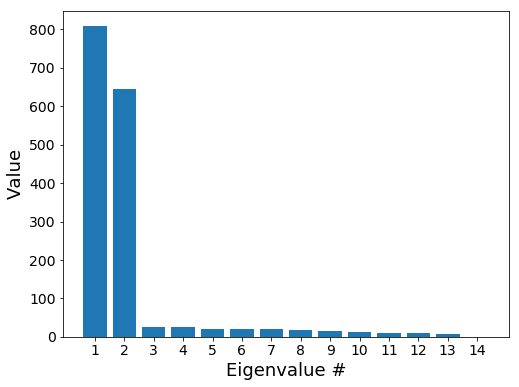

In [51]:
# eigenvalue indices
inds = list(range(1, len(eigenvalues)+1))
plt.figure(figsize=(8,6))
plt.bar(inds, eigenvalues)
plt.xticks(inds, fontsize='14')
plt.yticks(fontsize='14')
plt.xlabel('Eigenvalue #', fontsize='18')
plt.ylabel('Value', fontsize='18')
plt.show()

In [53]:
sum(eigenvalues)

1639.5914464575887

I think that this dataset has a "true" dimensionality of 2. As you can see by the eigenvalues, the majority of the variance in the data (nearly 90%) occurs along the first 2 principle component axes. The 3rd eigenvalue shows a very sharp decline from the first 2.

## (b)

In [64]:
# Compute projection onto the first principle component
proj1 = np.matmul(M_tilde, Vh[0])

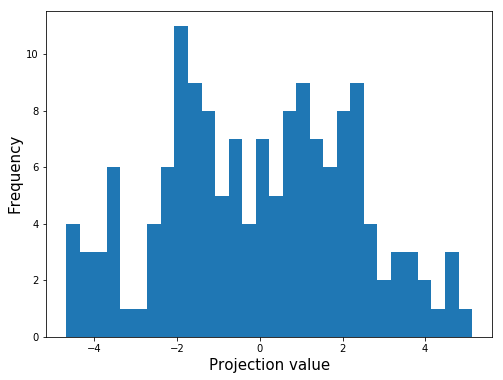

In [65]:
# Plot a histogram of the projected values
plt.figure(figsize=(8,6))
plt.hist(proj1, bins=30)
plt.xlabel('Projection value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [78]:
# Show that the sum of squares of the projected values is equal 
# to the first eigenvalue (within small precision error)
sum_of_squares1 = np.sum(np.square(proj1))
assert np.abs(sum_of_squares1 - eigenvalues[0]) < 1e-3
print('First eigenvalue: %0.3f' % eigenvalues[0])
print('Sum of squares: %0.3f' % sum_of_squares1)

First eigenvalue: 808.577
Sum of squares: 808.577


In [81]:
# To compute what portion of the variance lies along this component,
# we must compute what portion of the total eigenvalue mass lies in
# this eigenvalue
portion = eigenvalues[0]/np.sum(eigenvalues)
print('Portion of the variance that lies along PC 1: %0.2f%%' % (100*portion))

Portion of the variance that lies along PC 1: 49.32%


## (c)

In [84]:
# Compute projection onto the first two components
proj1and2 = np.matmul(M_tilde, Vh[:2].T)

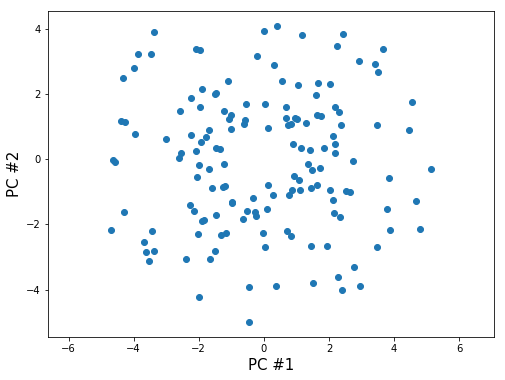

In [93]:
# Show a scatter plot of the first 2 principle components, using
# equal scales on the two axes
plt.figure(figsize=(8,6))
plt.scatter(proj1and2[:,0], proj1and2[:,1])
plt.axis('equal')
plt.xlabel('PC #1', fontsize=15)
plt.ylabel('PC #2', fontsize=15)
plt.show()

In [98]:
# Show that the sum of the squared lengths of these vectors
# is equal to lambda1 + lambda2 (within precision error)
lengths = np.linalg.norm(proj1and2, axis=1)
sum_of_squares1and2 = np.sum(np.square(lengths))
assert np.abs(sum_of_squares1and2 - (eigenvalues[0] + eigenvalues[1])) < 1e-3
print('Sum of lambda1 + lambda2: %0.3f' % (eigenvalues[0] + eigenvalues[1]))
print('Sum of squared lengths of projected vectors: %0.3f' % sum_of_squares1and2)

Sum of lambda1 + lambda2: 1452.596
Sum of squared lengths of projected vectors: 1452.596


## (d)

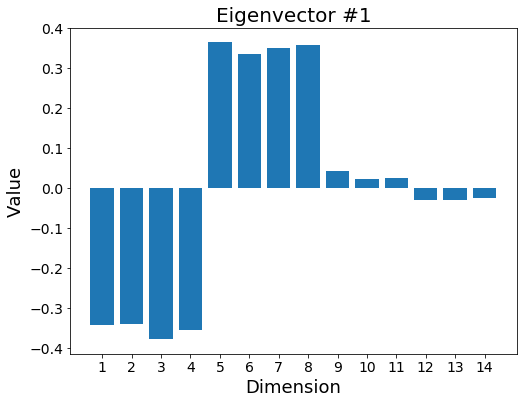

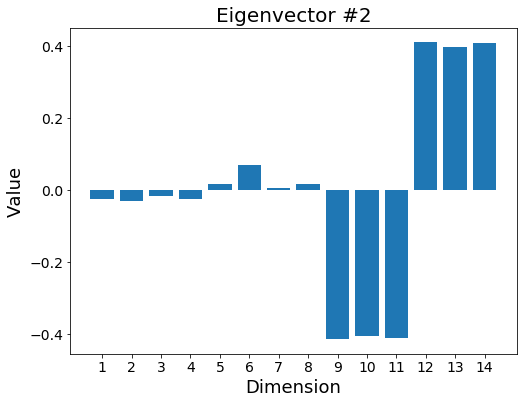

In [105]:
# Let's plot eigenvectors 1 & 2.
inds = list(range(1, 15))
# starting with 1:
plt.figure(figsize=(8,6))
plt.title('Eigenvector #1', fontsize=20)
plt.bar(inds, Vh[0])
plt.xticks(inds, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dimension', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.show()
print('\n')
# now 2:
plt.figure(figsize=(8,6))
plt.title('Eigenvector #2', fontsize=20)
plt.bar(inds, Vh[1])
plt.xticks(inds, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dimension', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.show()

Eigenvector \#1 prefers a vector with negative values in dimensions 1-4 and positive values in dimensions 5-8. The values of dimensions 9-14 have negligible impact for this filter.

Eigenvector \#2 prefers a vector with negative values in dimensions 9-11 and positive values in dimensions 12-14. The values of dimensions 1-8 have negligible impact.

It would be possible to categorize... TODO

# Problem #2

## 2.35

### (a)

Let $\tilde{x_2}$ represent the vector $\vec{x_2}$ shifted $1$ timestep to the left. Then the output $T(\tilde{x_2})$ is equivalent to the vector $T(\vec{x_2})$ shifted $1$ timestep to the left, since the system $T$ is time invariant. Thus, $T(\tilde{x_2})$ is the vector with a value of $2$ at $n=1$ and $4$ at $n=2$, with all other elements set to $0$.

Now, note that $\vec{x_1} = \vec{x_2} + \frac{1}{2}\tilde{x_2}$, and thus $T(\vec{x_1}) = T(\vec{x_2} + \frac{1}{2}\tilde{x_2})$ which we know is the vector with value $2$ at $n=1$, value $3$ at $n=2$, and $0$ elsewhere. For the system $T$ to be linear, by the principle of superposition we would need to have it be the case that $T(\vec{x_2} + \frac{1}{2}\tilde{x_2}) = T(\vec{x_2}) + \frac{1}{2}T(\tilde{x_2})$. Let's check if this is the case:

$T(\vec{x_2}) + \frac{1}{2}T(\tilde{x_2})$ = [vector with value $2$ at $n=2$ and value $4$ at $n=3$, $0$ elsewhere] + [vector with value $1$ at $n=1$ and value $2$ at $n=2$, $0$ elsewhere] = [vector with value 1 at n=1, value 4 at n=2 and n=3, 0 elsewhere].

This is a different vector from $T(\vec{x_1})$, so the system is not linear.

### (b)

Assume we are given $\delta[n]$, a vector that is $0$ everywhere except at index $n=0$, where it is $1$. Note that $\delta[n]$ is equivalent to the vector $\vec{x_3}$ shifted $4$ steps to the left. Since the system $T$ is time invariant, this means that $T(\delta[n])$ must be equivalent to $T(\vec{x_3})$ shifted $4$ steps to the left. Thus, the response $y[n] = T(\delta[n])$ is equal to the vector with value 3 at -6 and value 2 at -5, and 0 elsewhere.

### (c)

Since the system $T$ is time-invariant, we can determine the response of $T$ for any vector that is a time-shifted version of $\vec{x_1}$, $\vec{x_2}$ or $\vec{x_3}$, since we know the responses for these $3$ vectors. If the system were linear, we would be able to determine the response for linear combinations of these $3$ vectors, however this is not the case. Thus, we can only determine responses for input vectors that are time-shifted versions of $\vec{x_1}$, $\vec{x_2}$ or $\vec{x_3}$.

## 2.36

### (a)

### (b)

# Problem #3

In [41]:
# NOTE: grader must have Python bindings for MATLAB installed.
# See here for details: https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html
import os
import matlab.engine
eng = matlab.engine.start_matlab()
eng.addpath(os.path.realpath('.'),nargout=0)

## (a)

In [11]:
def unknownSystemX(vec, X):
    """
    A wrapper function for the matlab function unknownSystemX.
    Does the necessary data type transformations to the input, 
    calls the matlab function, transforms the output back 
    into numpy, and returns.
    """
    assert X in [1,2,3], 'paramter X must be an integer thats either 1, 2 or 3.'
    vec_m = matlab.double(vec.tolist())
    if X == 1:
        output = eng.unknownSystem1(vec_m)
    elif X == 2:
        output = eng.unknownSystem2(vec_m)
    else:
        output = eng.unknownSystem3(vec_m)
        
    return np.asarray(output)

def createImpulseColumnVec(n, D=64):
    """
    Creates a column vector of dimensionality D that is an impulse 
    vector with value 1 at entry n.
    """
    x = np.zeros((D, 1))
    x[n,0] = 1
    return x

First I will test that each system is shift-invariant by observing the response to an impulse vector at n=0 and then a few successive impulse vectors

In [72]:
def checkShiftInvariantAndCircular(X, verbose=False):
    """
    A function to test the shift invariance of unknownSystemX.
    Measures response to an impulse at n=0 and compares shifted
    versions of this response to the responses of impulses at a
    few later positions. Also checks on the periodic boundary-handling.
    """
    # first observe response to impulse vector at n=0
    x0 = createImpulseColumnVec(0)
    y0 = unknownSystemX(x0, X)
    # cycle through and check the first 5
    for i in range(1, 6):
        # observe response to impulse vector at n=i
        x = createImpulseColumnVec(i)
        y = unknownSystemX(x, X)
        # compare it to response of n=0 shifted by i
        y0_shifted = np.roll(y0, i)
        assert np.array_equal(y, y0_shifted), \
        'Test failed: unknownSystem%i is not shift-invariant.' % X
        if verbose:
            print('y[%i]: \n' % i, y.reshape(-1,))
            print('y[0] shifted by %i: \n' % i, y0_shifted.reshape(-1,))
            print('\n')
            
    # now, check for circular boundary handling. Shift impulse vector
    # backwards and check for equality
    for i in range(-6, 0):
        # observe response to impulse vector at n=i
        x = createImpulseColumnVec(i)
        y = unknownSystemX(x, X)
        # compare it to response of n=0 shifted by i
        y0_shifted = np.roll(y0, i)
        assert np.array_equal(y, y0_shifted), \
        'Test failed: unknownSystem%i does not have circular boundary handling.' % X
        if verbose:
            print('y[%i]: \n' % i, y.reshape(-1,))
            print('y[0] shifted by %i: \n' % i, y0_shifted.reshape(-1,))
            print('\n')
    
    print('Test passed: unknownSystem%i is shift-invariant and has circular boundary handling.' % X)

In [73]:
# note to grader: call these functions with verbose=True to visualize the tests
checkShiftInvariantAndCircular(X=1)

Test passed: unknownSystem1 is shift-invariant and has circular boundary handling.


In [74]:
checkShiftInvariantAndCircular(X=2)

Test passed: unknownSystem2 is shift-invariant and has circular boundary handling.


In [75]:
checkShiftInvariantAndCircular(X=3)

AssertionError: Test failed: unknownSystem3 does not have circular boundary handling.

So we see that systems 1 & 2 are shift invariant w/ circular boundary handling, but not system 3. Now, let's check for each of these systems whether the response to a sum of two impulses is equal to the sum of their individual responses.

In [ ]:
def checkLinearity(X, verbose=False):
    """
    Function to check the linearity of unknownSystemX. To do this,
    we check that the response to a sum of two different impulse 
    vectors is equal to the sum of their individual responses.
    """
    # define two input vectors
    x0 = createImpulseColumnVec(0)
    x1 = createImpulseColumnVec(1)
    # compute their individual responses
    y0 = unknownSystemX(x0, X)
    y1 = unknownSystemX(x1, X)
    # compute the response to the sum of these two vectors
    y_sum = unknownSystemX(x0+x1, X)
    # if 'verbose' option is set, let's print out our comparison
    if verbose:
        print('Response to first impulse vector: \n', y0)
        print('Response to second impulse vector: \n', y1)
        print('Re')
    # check that it is equal to the sum of their individual responses
    assert np.array_equal(y_sum, y0+y1), 'Test failed: unknownSystem%i is not linear.' % X
    print('Test passed: unknownSystem%i is linear' % X)

## (b)

## (c)

# Problem #4

## (a)

## (b)

## (c)